In [18]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import hdbscan

In [5]:
df = pd.read_csv('../Datasets/df_all_linkedin.csv')
df.drop_duplicates('Description', inplace=True, keep='first')
descriptions = df['Description'].values
job_titles = df['Job_Title'].values

In [11]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 852.3 MB 21.5 MB/s eta 0:00:01
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.0.0-py3-none-any.whl size=853631440 sha256=2410c23a1bf94fb7b80fdc4b4cf1173afd23dedcbb2265f680c3a0da7530bd6a
  Stored in directory: /private/var/folders/cb/gx9lbmzn5rx4xh6bjrjny0sc0000gn/T/pip-ephem-wheel-cache-rnachwts/wheels/60/ce/b7/3a1fe6c3db223cef182f2f9247e62dfa3a94054f8ad8984244
Successfully built en-core-web-lg

    Linking successful
    /Users/josh-mantovani/anaconda3/lib/python3.7/site-packages/en_core_web_lg
    -->
    /Users/josh-mantovani/anaconda3/lib/python3.7/site-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [6]:
nlp = spacy.load('en_core_web_lg')

In [17]:
nlp(descriptions[0]).vector

array([-5.83556145e-02,  1.26388252e-01, -6.27058893e-02, -6.24982081e-03,
        7.61358440e-02,  4.69093397e-02,  8.73594079e-03, -4.35118712e-02,
        2.48603206e-02,  1.87685049e+00, -1.83239758e-01,  1.54707693e-02,
        1.35930553e-02,  7.87561946e-03, -4.91598509e-02, -1.70000885e-02,
       -4.76536155e-02,  1.39459622e+00, -2.17775866e-01, -1.93194896e-02,
       -7.72778993e-04, -2.40540393e-02, -1.39718622e-01, -6.69847801e-02,
        8.22937936e-02,  6.66654930e-02,  2.73152292e-02,  3.70148346e-02,
        8.92182067e-02, -3.65807526e-02,  3.09334858e-03, -1.68064944e-02,
        3.91159467e-02,  4.56467308e-02,  5.22024669e-02, -9.14225131e-02,
       -1.64294586e-04,  3.02323606e-02, -2.05676183e-02, -9.11581144e-02,
       -1.07562426e-03,  4.35235687e-02, -1.36614349e-02, -2.16665305e-02,
       -8.16280320e-02,  5.65693527e-02, -6.58482015e-02,  8.13517123e-02,
        3.60876918e-02,  2.34042238e-02,  3.04940250e-02, -2.22779829e-02,
        6.91513438e-03, -

In [7]:
vectorized_descriptions = []
for descrip in descriptions:
    vec = nlp(descrip).vector
    vectorized_descriptions.append(vec)


In [38]:
kmeans = KMeans(n_clusters=3, n_jobs=-1)
kmeans.fit(vectorized_descriptions)
cluster_centers = kmeans.cluster_centers_


In [52]:
for center in cluster_centers:
    sim = euclidean_distances(center.reshape(1,-1), vectorized_descriptions)
    order = np.argsort(sim)
    print(f'\n Cluster representation: ')
#     print(order)
    for o in order[0][:5]:
        print(job_titles[o])
    


 Cluster representation: 
Data Scientist
Senior Data Scientist
Health Data Engineer/Architect
Senior Data Engineer - Data Science
Principal Researcher in Data Science for Power Systems (E6)

 least representative jobs: 
Data Scientist
Data Scientist
Data Scientist
Senior Manager Data Science

 Cluster representation: 
Lead Data Science Engineer
Data Scientist
Intern - Software/ Data Science
Manager of Data Science
Data Scientist

 least representative jobs: 
Data Scientist
Data Scientist
Data Scientist
Senior Manager Data Science

 Cluster representation: 
Business Intelligence Engineer
CCIP Intern- Data Scientist Anly Intern
Sr. Data Scientist, Forecasting
Senior Data Scientist
Lead Data Scientist - Automation Lab (PwC Labs)

 least representative jobs: 
Data Scientist
Data Scientist -Tampa
Insurance Data Scientist 86679
Director of Data Science


In [56]:
silhouette_score(vectorized_descriptions, kmeans.labels_)

0.11379015

In [61]:
k_values = [i for i in range(2,200)]
ss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_jobs=-1)
    kmeans.fit(vectorized_descriptions)
    score = silhouette_score(vectorized_descriptions, kmeans.labels_)
    ss_list.append(score)


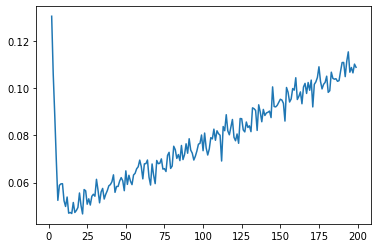

In [62]:
fig, ax = plt.subplots()
ax.plot(k_values, ss_list)

In [35]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(pca_descrips)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=15, min_samples=None, p=None,
        prediction_data=False)

In [11]:
len(clusterer.exemplars_[0])

5

In [13]:
pca = PCA(n_components=2)
pca_descrips = pca.fit_transform(vectorized_descriptions)

In [14]:
pca_descrips

array([[ 0.04257327,  0.116858  ],
       [ 0.35186126,  0.12428329],
       [-0.2996997 ,  0.02569921],
       ...,
       [-0.02366528,  0.03819088],
       [-0.094263  ,  0.0041075 ],
       [-0.22050146, -0.07404962]])

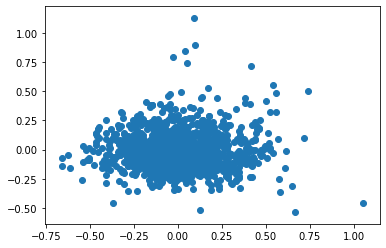

In [16]:
fig, ax = plt.subplots()
ax.scatter(pca_descrips[:,0], pca_descrips[:,1])

In [30]:
np.ptp(clusterer.labels_)

44

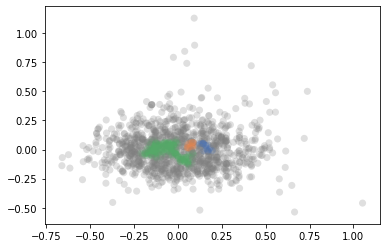

In [36]:
color_palette = sns.color_palette('deep', 45)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*pca_descrips.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [38]:
import torch
from pytorch_pretrained_bert import BertTokenizer

In [39]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 1358581.57B/s]


In [42]:
tokenizer.convert_tokens_to_ids('word')

[1059, 1051, 1054, 1040]

In [43]:
tokenizer.convert_tokens_to_ids('sentence')

[1055, 1041, 1050, 1056, 1041, 1050, 1039, 1041]

In [44]:
tokenizer.convert_tokens_to_ids('dog')

[1040, 1051, 1043]

In [49]:
tokenizer.tokenize('word sentence')

['word', 'sentence']

In [50]:
import torch
from pytorch_transformers import *

ModuleNotFoundError: No module named 'pytorch_transformers'